# Task 2 - Prediction using Unsupervised ML

## Problem Statement

#### predict the optimum number of clusters and represent it visually.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.shape

(150, 4)

In [4]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualization

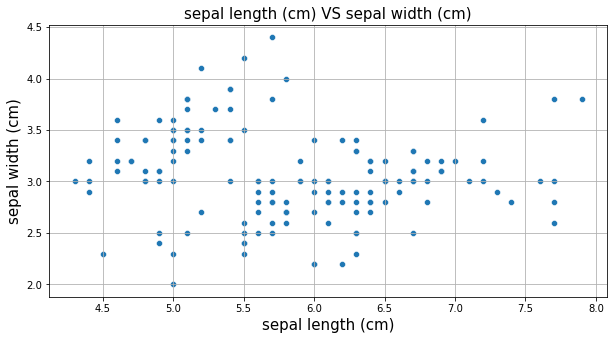

In [6]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['sepal length (cm)'],y=df['sepal width (cm)'])
plt.xlabel('sepal length (cm)',fontsize=15)
plt.ylabel('sepal width (cm)',fontsize=15)
plt.title('sepal length (cm) VS sepal width (cm)',fontsize=15)
plt.grid()
plt.show()

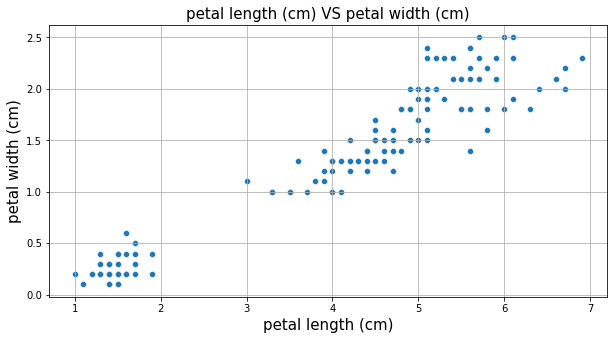

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'])
plt.xlabel('petal length (cm)',fontsize=15)
plt.ylabel('petal width (cm)',fontsize=15)
plt.title('petal length (cm) VS petal width (cm)',fontsize=15)
plt.grid()
plt.show()

#### We can see two separate clusters but not sure about the species.

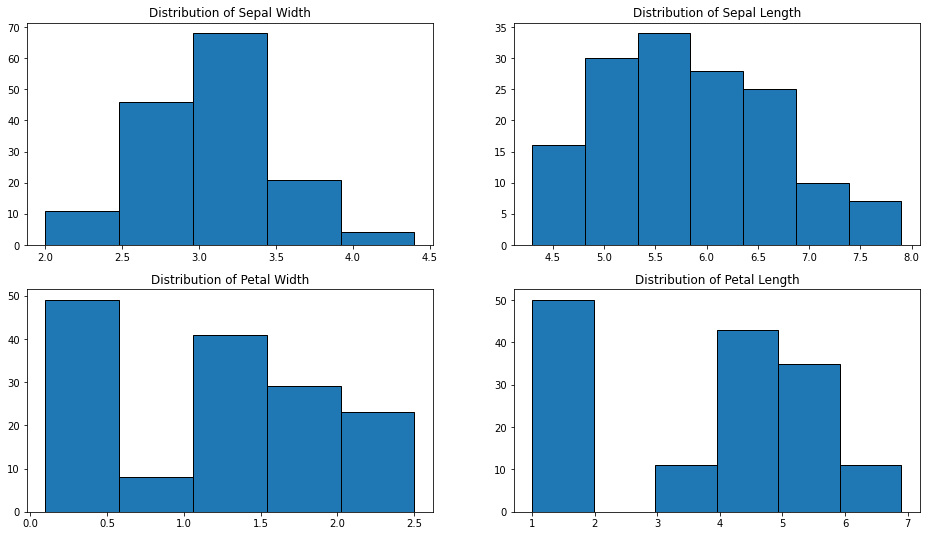

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['sepal width (cm)'], bins=5,ec='black')
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['sepal length (cm)'], bins=7,ec='black')
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['petal width (cm)'], bins=5,ec='black')
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['petal length (cm)'], bins=6,ec='black')
plt.show()

#### The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
#### The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
#### The Highest frequency of petal width is between 0 to 0.5 which is around 50.
#### The Highest frequency of petal length is between 0 to 0.5 which is around 50.

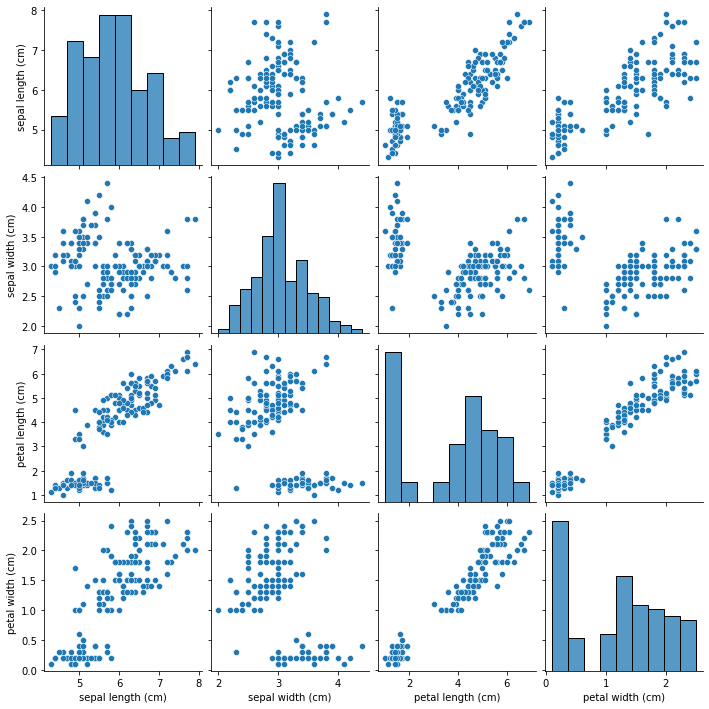

In [9]:
sns.pairplot(df)
plt.show()

### Prepare Data

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df)

### finding the optimum number of clusters for K Means i.e. determining the value of K? 

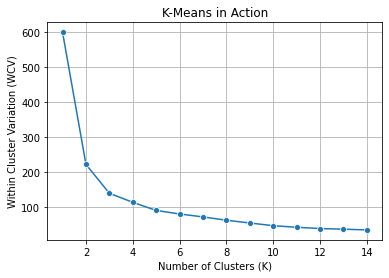

In [11]:
wcv = []

for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcv.append(km.inertia_)
    
sns.lineplot(range(1, 15), wcv,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Variation (WCV)')
plt.title('K-Means in Action')
plt.grid()
plt.show()    

#### In the graph plotted between 'K and 'WCV' , we look for an elbow( the point after which the descent of the graph changes from being exponential to linear. This gives us optimal value of k. 

#### From this we can see the number of clusters as  3 

In [12]:
kn = KMeans(n_clusters=3)
y_pred_tr = kn.fit_predict(X)

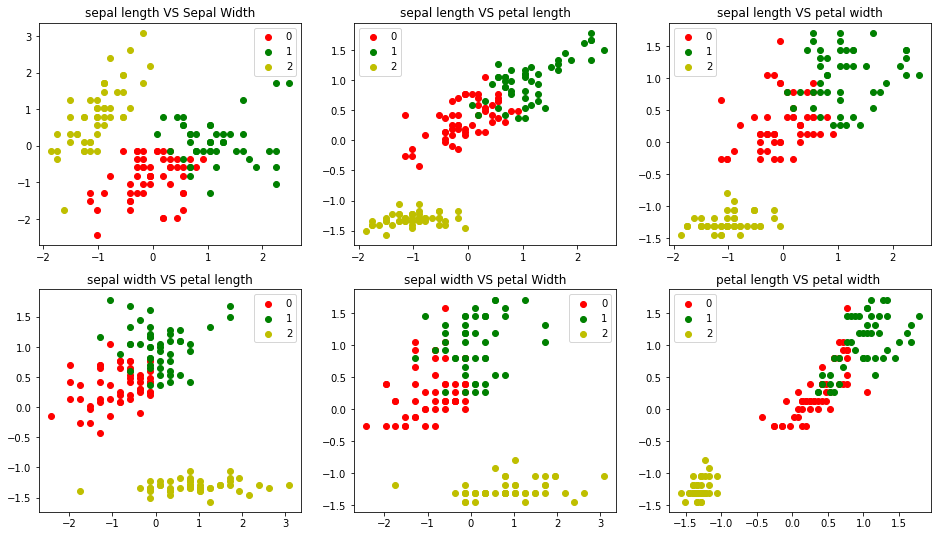

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(16,9))
axes[0,0].set_title("sepal length VS Sepal Width")
axes[0,0].scatter(X[y_pred_tr == 0, 0], X[y_pred_tr == 0, 1], c = "r", label = "0")
axes[0,0].scatter(X[y_pred_tr == 1, 0], X[y_pred_tr == 1, 1], c = "g", label = "1")
axes[0,0].scatter(X[y_pred_tr == 2, 0], X[y_pred_tr == 2, 1], c = "y", label = "2")
axes[0,0].legend()

axes[0,1].set_title("sepal length VS petal length")
axes[0,1].scatter(X[y_pred_tr == 0, 0], X[y_pred_tr == 0, 2], c = "r", label = "0")
axes[0,1].scatter(X[y_pred_tr == 1, 0], X[y_pred_tr == 1, 2], c = "g", label = "1")
axes[0,1].scatter(X[y_pred_tr == 2, 0], X[y_pred_tr == 2, 2], c = "y", label = "2")
axes[0,1].legend()

axes[0,2].set_title("sepal length VS petal width")
axes[0,2].scatter(X[y_pred_tr == 0, 0], X[y_pred_tr == 0, 3], c = "r", label = "0")
axes[0,2].scatter(X[y_pred_tr == 1, 0], X[y_pred_tr == 1, 3], c = "g", label = "1")
axes[0,2].scatter(X[y_pred_tr == 2, 0], X[y_pred_tr == 2, 3], c = "y", label = "2")
axes[0,2].legend()

axes[1,0].set_title("sepal width VS petal length")
axes[1,0].scatter(X[y_pred_tr == 0, 1], X[y_pred_tr == 0, 2], c = "r", label = "0")
axes[1,0].scatter(X[y_pred_tr == 1, 1], X[y_pred_tr == 1, 2], c = "g", label = "1")
axes[1,0].scatter(X[y_pred_tr == 2, 1], X[y_pred_tr == 2, 2], c = "y", label = "2")
axes[1,0].legend()

axes[1,1].set_title("sepal width VS petal Width")
axes[1,1].scatter(X[y_pred_tr == 0, 1], X[y_pred_tr == 0, 3], c = "r", label = "0")
axes[1,1].scatter(X[y_pred_tr == 1, 1], X[y_pred_tr == 1, 3], c = "g", label = "1")
axes[1,1].scatter(X[y_pred_tr == 2, 1], X[y_pred_tr == 2, 3], c = "y", label = "2")
axes[1,1].legend()

axes[1,2].set_title("petal length VS petal width ")
axes[1,2].scatter(X[y_pred_tr == 0, 2], X[y_pred_tr == 0, 3], c = "r", label = "0")
axes[1,2].scatter(X[y_pred_tr == 1, 2], X[y_pred_tr == 1, 3], c = "g", label = "1")
axes[1,2].scatter(X[y_pred_tr == 2, 2], X[y_pred_tr == 2, 3], c = "y", label = "2")
axes[1,2].legend()
plt.show()